In [22]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data
import os


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

import acquire
import prepare

In [36]:
telco = prepare.prep_telco_alternative()

### 

### Are tenure and monthly charges dependent or correlated

<Axes: xlabel='monthly_charges', ylabel='tenure'>

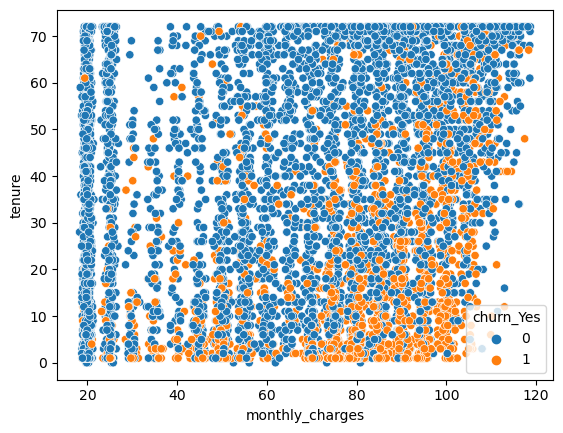

In [37]:
sns.scatterplot(telco, x='monthly_charges', y='tenure', hue='churn_Yes')

In [38]:
#Meld together
continuous = pd.crosstab(telco.monthly_charges, telco.tenure)
continuous

tenure,0,1,2,3,4,5,6,7,8,9,...,63,64,65,66,67,68,69,70,71,72
monthly_charges,,,,,,,,,,,,,,,,,,,,,
18.25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18.40,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18.55,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18.70,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18.75,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118.20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
118.35,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
118.60,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [39]:
#Create new relationship
telco['charge_tenure_ratio'] = telco.tenure/telco.monthly_charges
telco

,Unnamed: 0,senior_citizen,tenure,monthly_charges,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,multiple_lines_Yes,...,churn_Yes,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,charge_tenure_ratio
0,0,0,9,65.60,0,1,1,1,0,0,...,0,0,0,0,0,1,0,1,0,0.137195
1,1,0,9,59.90,1,0,0,1,0,1,...,0,0,0,0,0,1,1,0,0,0.150250
2,2,0,4,73.90,1,0,0,1,0,0,...,1,1,0,0,1,0,1,0,0,0.054127
3,3,1,13,98.00,1,1,0,1,0,0,...,1,1,0,0,1,0,1,0,0,0.132653
4,4,1,3,83.90,0,1,0,1,0,0,...,1,1,0,0,0,1,1,0,0,0.035757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,0,13,55.15,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0.235721
7039,7039,0,22,85.10,1,1,0,1,0,1,...,1,1,0,0,1,0,1,0,0,0.258519
7040,7040,0,2,50.30,1,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0.039761
7041,7041,0,67,67.85,1,1,1,1,0,0,...,0,0,0,0,0,1,0,0,1,0.987472


### Does there seem to be a relationship here?

<Axes: xlabel='churn_Yes', ylabel='charge_tenure_ratio'>

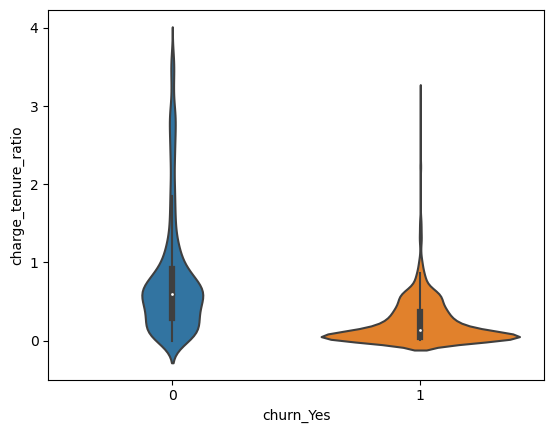

In [40]:
sns.violinplot(data=telco, x='churn_Yes', y='charge_tenure_ratio')

/usr/local/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 65.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 68.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='churn_Yes', ylabel='charge_tenure_ratio'>

/usr/local/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 76.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 79.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


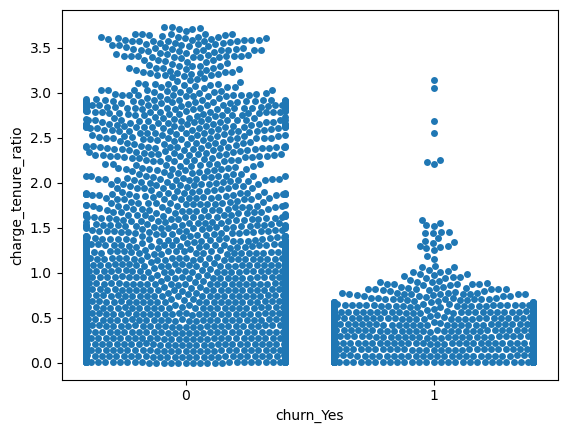

In [10]:
sns.swarmplot(data=telco, x='churn_Yes', y='charge_tenure_ratio')

<Axes: xlabel='churn_Yes', ylabel='charge_tenure_ratio'>

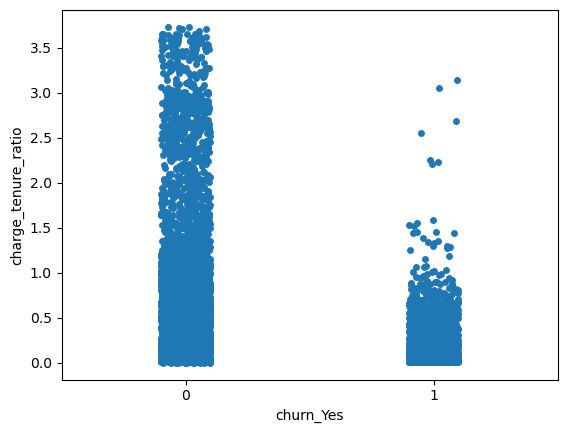

In [41]:
sns.stripplot(data=telco, x='churn_Yes', y='charge_tenure_ratio')

<Axes: xlabel='tenure', ylabel='monthly_charges'>

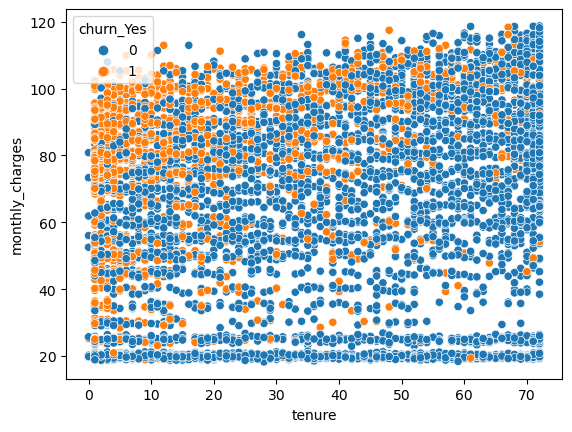

In [42]:
sns.scatterplot(data=telco, x='tenure', y='monthly_charges', hue='churn_Yes')

In [43]:
chi2, p, degf, expected = stats.chi2_contingency(continuous)
chi2, p, degf, expected

(117599.75576015131,
 9.036150061814391e-14,
 114048,
 array([[0.00156183, 0.08703677, 0.03379242, ..., 0.01689621, 0.02413744,
         0.05139855],
        [0.00156183, 0.08703677, 0.03379242, ..., 0.01689621, 0.02413744,
         0.05139855],
        [0.00156183, 0.08703677, 0.03379242, ..., 0.01689621, 0.02413744,
         0.05139855],
        ...,
        [0.00312367, 0.17407355, 0.06758484, ..., 0.03379242, 0.04827488,
         0.1027971 ],
        [0.00156183, 0.08703677, 0.03379242, ..., 0.01689621, 0.02413744,
         0.05139855],
        [0.00156183, 0.08703677, 0.03379242, ..., 0.01689621, 0.02413744,
         0.05139855]]))

In [44]:
stats.pearsonr(telco.monthly_charges, telco.tenure)

PearsonRResult(statistic=0.24789985628615005, pvalue=4.0940449915016345e-99)

### I am normaizing the tenure and monthly charges so as to optimize the knn predictions.  These should not have an adverse effect of trees random forests or the logistic regression models as the calc ulations are scaled accordingly.  In addition the logistic regression should be simplified as well.

In [45]:
telco['tenure_normalized'] = (telco.tenure - telco.tenure.min()) / (telco.tenure.max() - telco.tenure.min())

In [46]:
telco['monthly_charges_normalized'] = (telco.monthly_charges - telco.monthly_charges.min()) / (telco.monthly_charges.max() - telco.monthly_charges.min())

In [47]:
telco = telco.drop(columns=['tenure', 'monthly_charges'])

In [48]:
telco = telco.drop(columns=['online_backup_No internet service', 'device_protection_No internet service', 'tech_support_No internet service', 'streaming_tv_No internet service', 'streaming_movies_No internet service', 'online_security_No internet service'])

KeyError: "['online_backup_No internet service', 'device_protection_No internet service', 'tech_support_No internet service', 'streaming_tv_No internet service', 'streaming_movies_No internet service', 'online_security_No internet service'] not found in axis"

In [49]:
for col in telco.columns:
    col = pd.crosstab(telco[col], telco.churn_Yes)
    print(col)
    col_chi2, col_p, col_degf, col_expected = stats.chi2_contingency(col)
    print(f'(chi squared = {col_chi2}, p = {col_p}')
    print('___________________________________________________________')

churn_Yes   0  1
Unnamed: 0      
0           1  0
1           1  0
2           0  1
3           0  1
4           0  1
...        .. ..
7038        1  0
7039        0  1
7040        1  0
7041        1  0
7042        1  0

[7043 rows x 2 columns]
(chi squared = 7043.0, p = 0.49439767459438705
___________________________________________________________
churn_Yes          0     1
senior_citizen            
0               4508  1393
1                666   476
(chi squared = 159.42630036838742, p = 1.510066805092378e-36
___________________________________________________________
churn_Yes       0    1
gender_Male           
0            2549  939
1            2625  930
(chi squared = 0.4840828822091383, p = 0.48657873605618596
___________________________________________________________
churn_Yes       0     1
partner_Yes            
0            2441  1200
1            2733   669
(chi squared = 158.7333820309922, p = 2.1399113440759935e-36
__________________________________________________

In [50]:
telco.shape

(7043, 27)

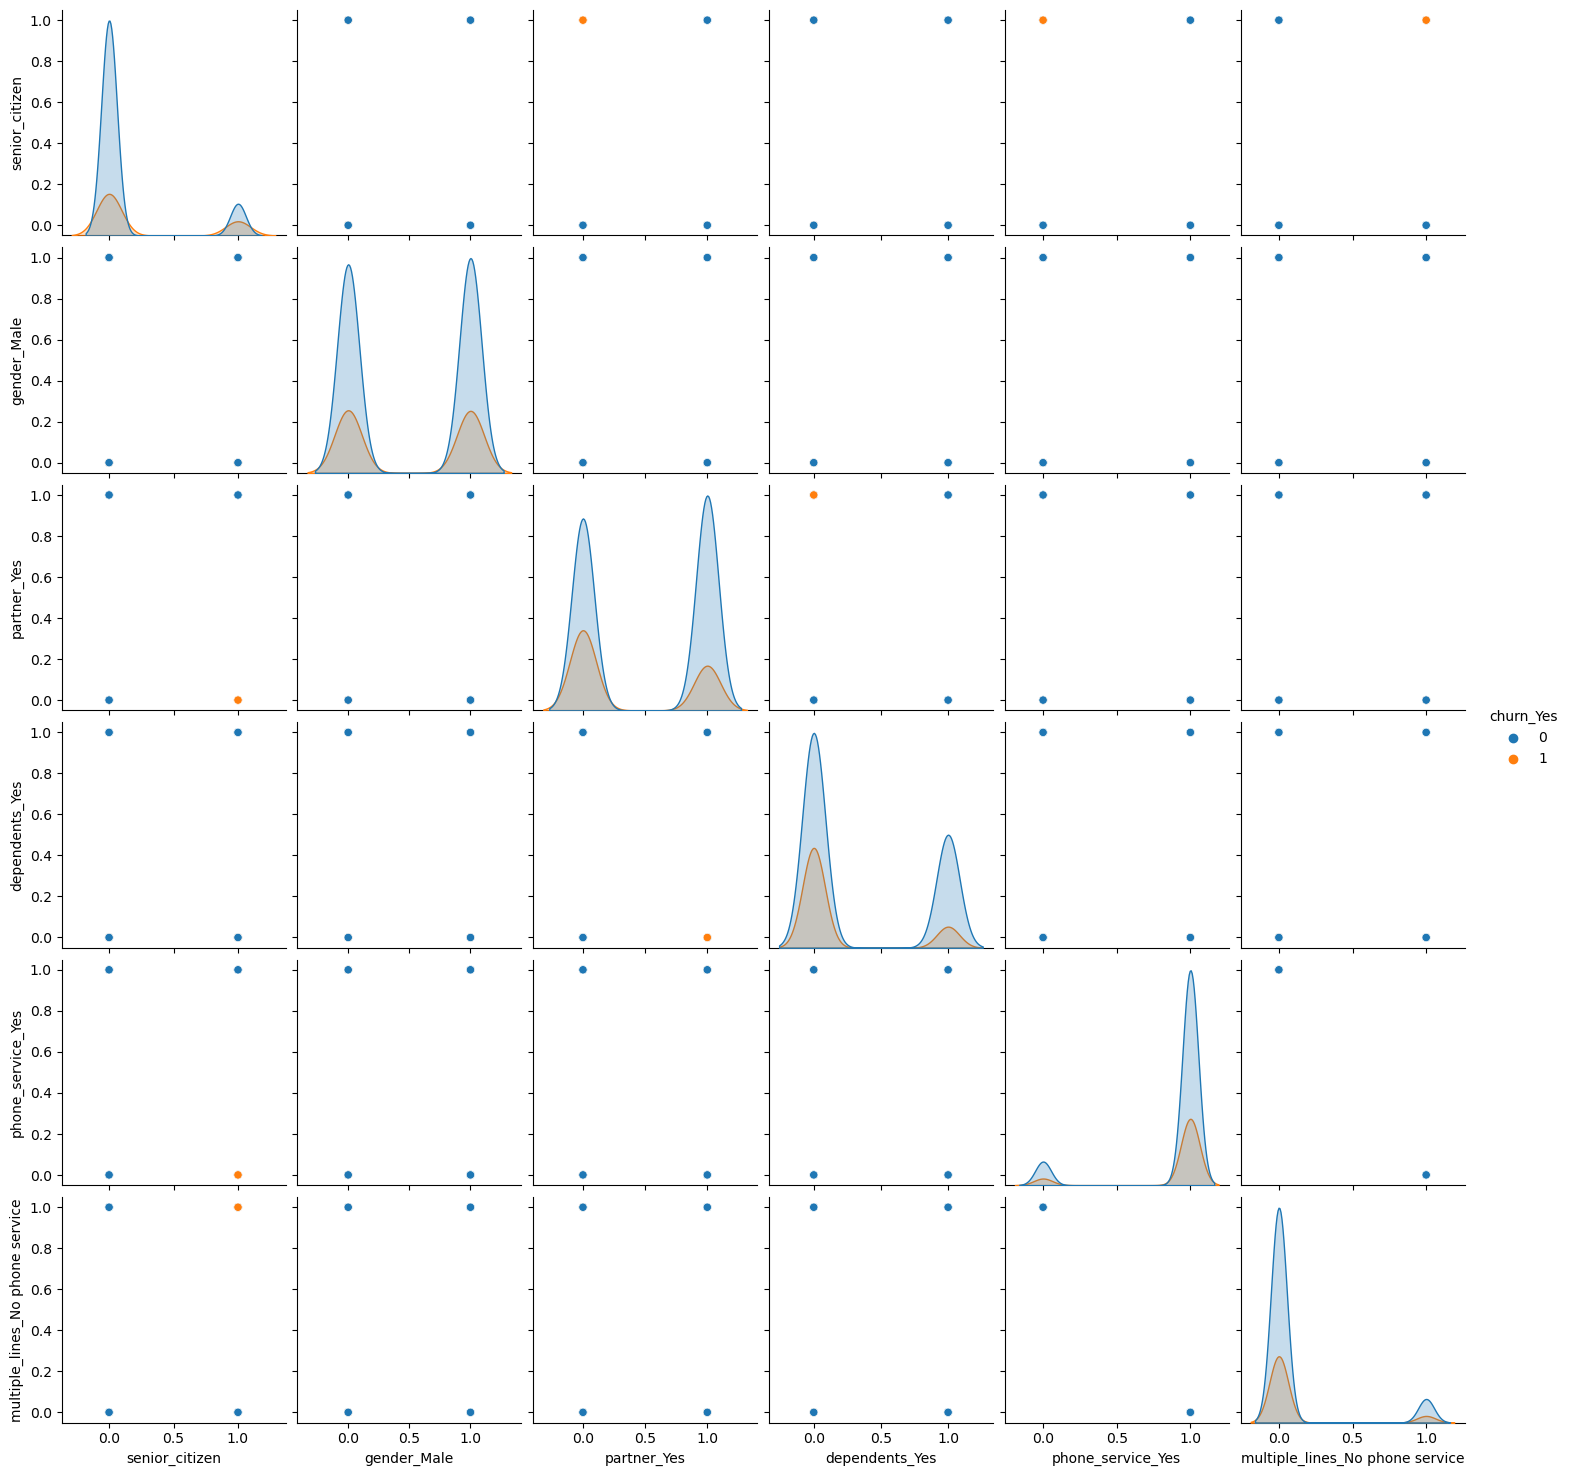

In [51]:
sns.pairplot(telco, x_vars = telco.columns[1:7], y_vars=telco.columns[1:7], hue='churn_Yes')

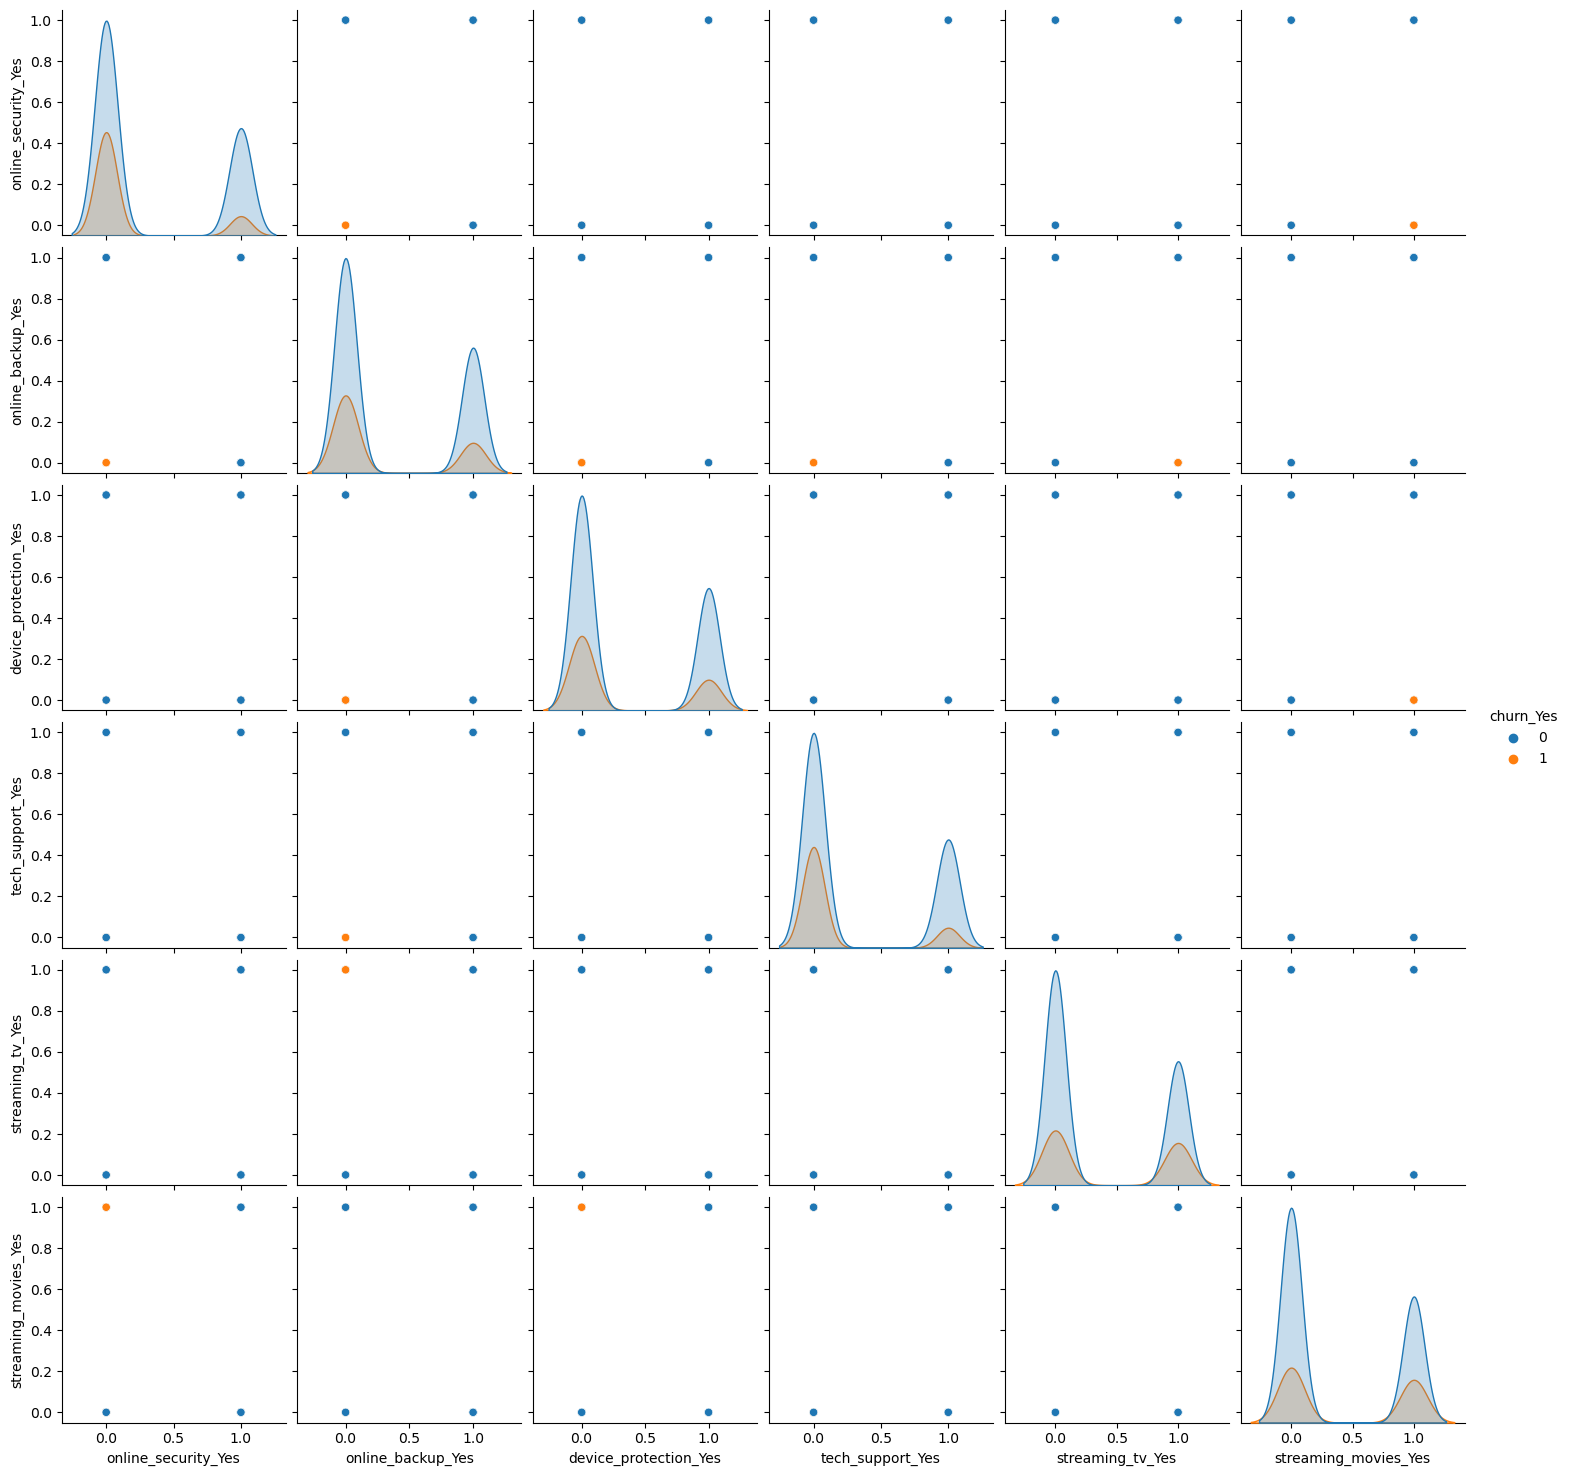

In [52]:
sns.pairplot(telco, x_vars = telco.columns[8:14], y_vars=telco.columns[8:14], hue='churn_Yes')

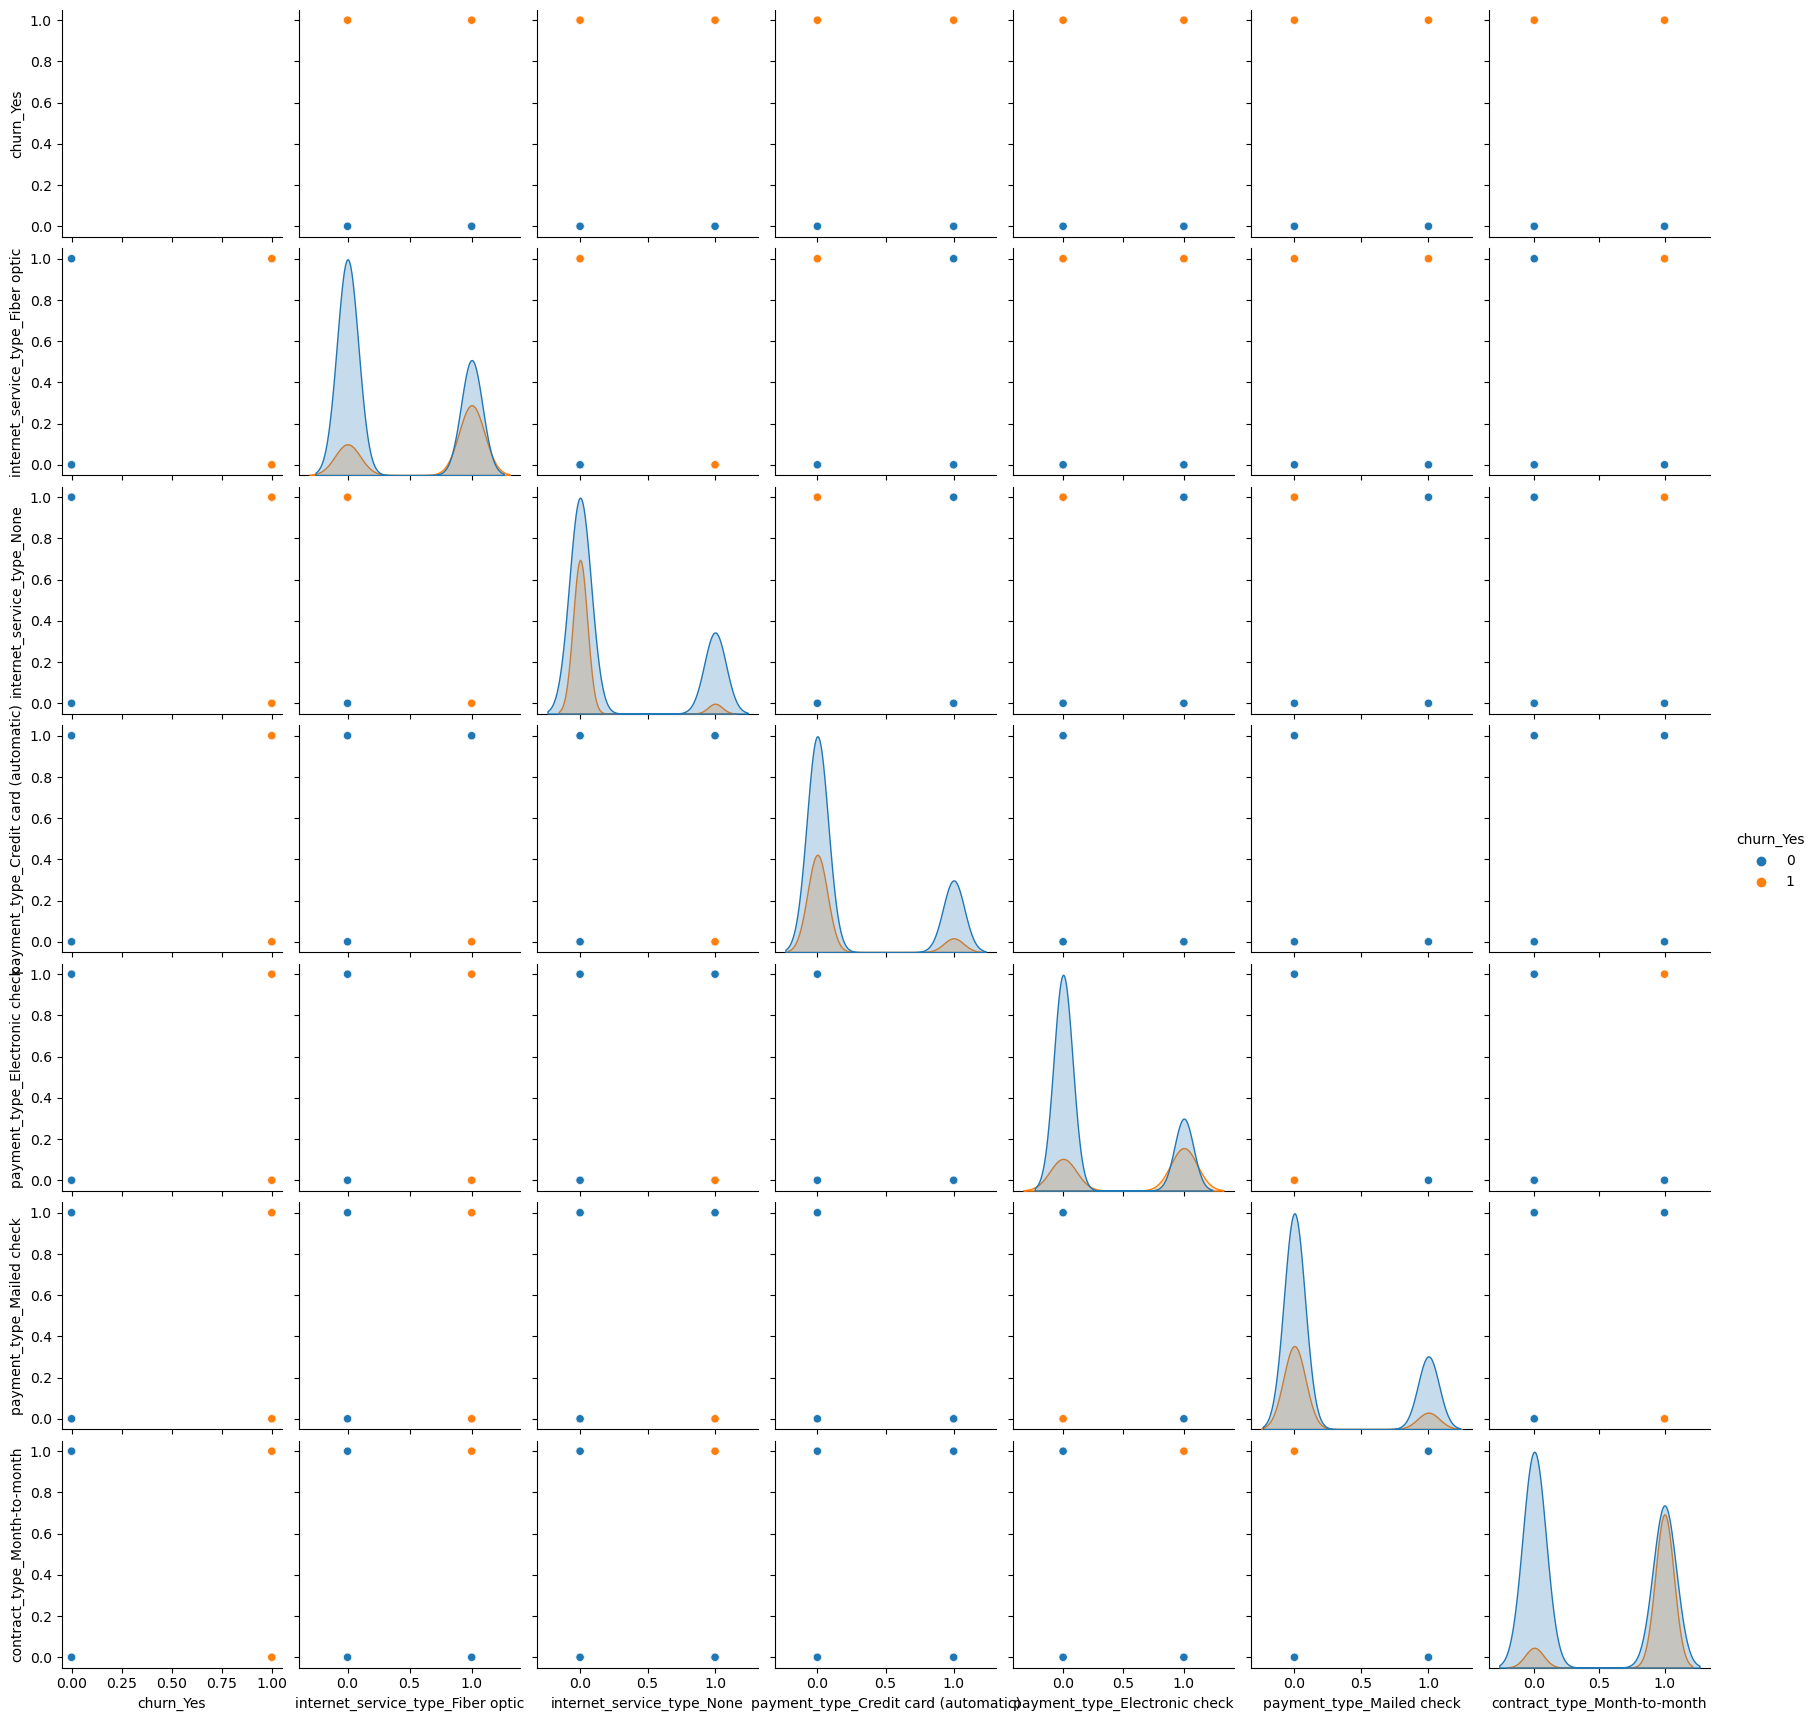

In [53]:
sns.pairplot(telco, x_vars = telco.columns[15:22], y_vars=telco.columns[15:22], hue='churn_Yes')

I performed this analysis before to see the dummy variable first column that was dropped.  Bringing this back should have no ulitmate impact on decision tree or random forest, outside of how the tree is labeled, but may have an impact on knn nearest neighbors especially since I am using manhattan coordinates.  Also it should add another layer to the logistic regression analysis which could theoretically help or hinder the result.  

In [54]:
telco_contract = telco[['contract_type_Month-to-month', 'contract_type_One year', 'contract_type_Two year', 'churn_Yes']]



In [55]:
month = pd.crosstab(telco['contract_type_Month-to-month'], telco['churn_Yes'])

In [56]:
chi2, p, degf, expected = stats.chi2_contingency(month)
chi2, p

(1153.9716611093477, 6.147585925549194e-253)

In [ ]:
sns.pairplot(telco, hue='churn_Yes')